<a href="https://colab.research.google.com/github/Kandeo/Project/blob/main/Cubicle_Gigglers_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Global Power Plant Data Analysis
# Overview

Over the years, production of electricity has been taking huge strides towards reducing the use of non-renewable resources.
Approximately 40% of global carbon dioxide emissions are emitted from electricity generation through the combustion of fossil fuels {Coal, Oil and Gas} to generate heat needed to power steam turbines. Burning these fuels results in the production of carbon dioxide — the primary heat-trapping, “greenhouse gas” responsible for global warming.

On the other hand, electricity from renewable resources such as solar, geothermal, and wind generally does not contribute to climate change or local air pollution since no fuels are combusted.
Due to that we venture into this research with the aim of looking at the global electricity production by source  and if it bears any effect to the environment. 

Objectives:

1. Identify the Largest source of electricity Production
2. Global Energy Consumption per Primary Fuel
3. Finding the Largest Electricity Generating Countries.
4. Relate the number of Power plants in a country to Total Production
5. Highlight the energy Source Based on Renewable/Non-renewable accounting  for the highest consumption.
6. Countries leading in  usage of Renewable/Non-renewable sources.
7. Relating the Global energy Consumption to the Kenyan context.

Dataset Link: https://datasets.wri.org/dataset/globalpowerplantdatabase 

 


# Loading Our Dataset

Importing Libraries

In [ ]:
#Importing the Pandas Library:
import pandas as pd 

#Importing the Numpy Library:
import numpy as np

#Importing matplot Library:
import matplotlib.pyplot as plt


Reading the Dataset

In [ ]:
#Reading the data from our CSV File:
df = pd.read_csv('global_power_plant_database.csv')

#Previewing the first 5 rows:
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


Accessing Information on the Dataset

In [ ]:
#To get information about our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

# Data Cleaning

Validity

In [ ]:
#Removing any irrelevant observation:
#The Columns: Commissioning Year, Plant Owner, Source, Url and Year of Capacity Data were unecessary on our analysis
df.drop(df.columns[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17]], axis = 1, inplace = True)
df.head(4)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
#Renaming the Column names Country, Plant Name and Capacity for uniformity:
df1=df.rename(columns = {'country_long': 'Country', 'name': 'Plant_Name', 'gppd_idnr': 'Plant_ID', 'capacity_mw': 'Capacity(MW)'}, inplace = False)
df1.head()

,country,Country,Plant_Name,Plant_ID,Capacity(MW),latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


Completeness

In [ ]:
#Checking for any null values:
df1.isnull().sum()

country                               0
Country                               0
Plant_Name                            0
Plant_ID                              0
Capacity(MW)                          0
latitude                              0
longitude                             0
primary_fuel                          0
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
generation_data_source            23536
estimated_generation_gwh_2013     18816
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
estimated_generation_gwh_2016     17366
estimated_generation_gwh_2017      1798
estimated_generation_note_2013        0
estimated_generation_note_2014        0
estimated_generation_note_2015        0
estimated_generation_note_2016        0


In [ ]:
#Further dropping the Columns with null values as they do not form any basis of our analysis:
df1.drop(df.columns[[0,8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], axis = 1, inplace = True)
df1.head(4)



,Country,Plant_Name,Plant_ID,Capacity(MW),latitude,longitude,primary_fuel,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
#Previewing our final data information:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         34936 non-null  object 
 1   Plant_Name                      34936 non-null  object 
 2   Plant_ID                        34936 non-null  object 
 3   Capacity(MW)                    34936 non-null  float64
 4   latitude                        34936 non-null  float64
 5   longitude                       34936 non-null  float64
 6   primary_fuel                    34936 non-null  object 
 7   estimated_generation_note_2013  34936 non-null  object 
 8   estimated_generation_note_2014  34936 non-null  object 
 9   estimated_generation_note_2015  34936 non-null  object 
 10  estimated_generation_note_2016  34936 non-null  object 
 11  estimated_generation_note_2017  34936 non-null  object 
dtypes: float64(3), object(9)
memory 

In [ ]:
#Checking for any Duplicates:
df1.duplicated().sum()

0

In [ ]:
#Checking the shape of out dataset:
df1.shape

(34936, 12)

Uniformity

In [ ]:
#To view the datatypes in our set:
df1.dtypes

Country                            object
Plant_Name                         object
Plant_ID                           object
Capacity(MW)                      float64
latitude                          float64
longitude                         float64
primary_fuel                       object
estimated_generation_note_2013     object
estimated_generation_note_2014     object
estimated_generation_note_2015     object
estimated_generation_note_2016     object
estimated_generation_note_2017     object
dtype: object

Exporting the dataset

In [ ]:
#To export our cleaned dataset:
df.to_csv('global_power_plant.csv')

# Data Analysis

1. **Global Energy Consumption**


In [ ]:
#To find out which fuel is mostly used to generate Power on a global scale:
df1.groupby('primary_fuel')['Capacity(MW)'].sum().sort_values(ascending=False).round()

primary_fuel
Coal              1965541.0
Gas               1493051.0
Hydro             1053160.0
Nuclear            407912.0
Wind               263054.0
Oil                261879.0
Solar              188312.0
Biomass             34281.0
Waste               14749.0
Geothermal          12688.0
Cogeneration         4048.0
Other                3613.0
Petcoke              2425.0
Storage              1712.0
Wave and Tidal        552.0
Name: Capacity(MW), dtype: float64

Text(0, 0.5, 'Capacity Production(mw)')

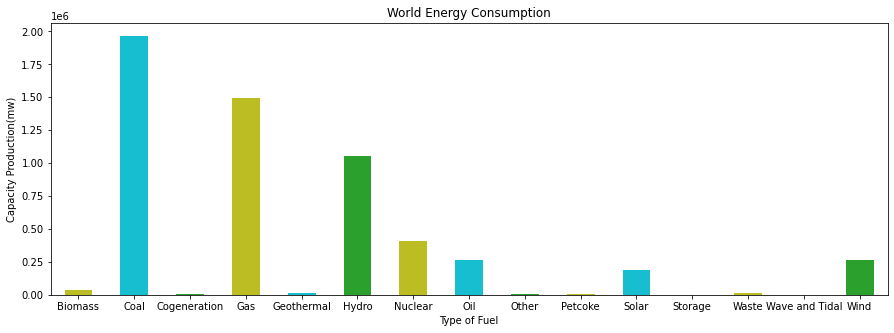

In [ ]:
#Visualising the above information:
C=df1.groupby('primary_fuel')['Capacity(MW)'].sum().round()
C.plot.bar(color=['C8', 'C9', 'C12'], x='primary_fuel', y='Capacity(MW)', rot=0, figsize=(15,5))
plt.title("World Energy Consumption")
plt.xlabel("Type of Fuel")
plt.ylabel("Capacity Production(mw)")

From the Graph, Coal and Gas account for the highest capacity production. This are Fossil Fuels which generally contribute to carbon emissions leading to pollution

2. a) **Largest Electricity Generating Countries**

In [ ]:
#Grouping by Country:
f = df1.groupby(['Country'])[['Capacity(MW)']].sum()
f.head()

#To get the highest generators:
f.sort_values('Capacity(MW)', ascending=False).head(5)

,Capacity(MW)
Country,
China,1415067.380
United States of America,1204638.050
India,316088.546
Russia,228220.050
Japan,215365.850


b) **Lowest Electrcity Generating Countries**

In [ ]:
#Countries with the lowest Production:

f = df.groupby(['country_long'])[['capacity_mw']].sum()
f.head()

#To get the highest producers:
f.sort_values('capacity_mw', ascending=True).head(5)

,capacity_mw
country_long,
Saint Lucia,3.000
Suriname,5.000
Palestine,7.600
Antarctica,7.600
Guinea-Bissau,18.237


Comparing The Highest to The Lowest Electricity Generators

Enter a country: China


Text(0, 0.5, 'Capacity Production(mw)')

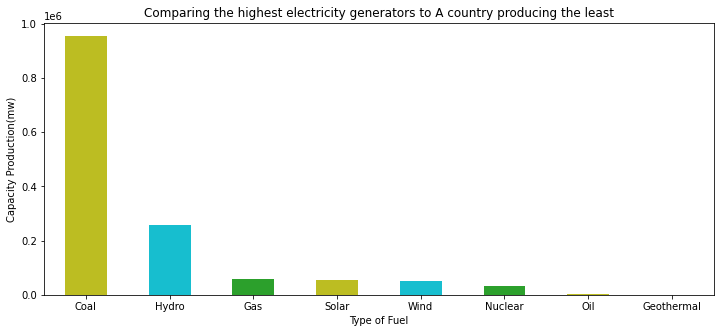

In [ ]:
#Comparing China the highest electricity generator to A country producing the least:
country = input("Enter a country: ")
C=df1[df1['Country']==country].groupby('primary_fuel')['Capacity(MW)'].sum().sort_values(ascending=False)
C.plot.bar(color=['C8', 'C9', 'C12'], x='primary_fuel', y='Capacity(MW)', rot=0, figsize=(12,5))
plt.title('Comparing the highest electricity generators to A country producing the least')
plt.xlabel("Type of Fuel")
plt.ylabel("Capacity Production(mw)")

Comparing The Countries with the Highest and Lowest Electricity Capacities shows that Leading countries obtain their electricity from several sources. A Country like China taps from 8 different sources. Palestine on the other hand has 1 Source of Energy.

3. a) **Do number of power plants affect Total Production**

In [ ]:
#Accesing Information based on the number of plants:
df1.groupby(['Country'])[['Plant_Name']].count().sort_values('Plant_Name', ascending=False).head(10)

#From the output, USA and China still lead in the number of power plants.

,Plant_Name
Country,
United States of America,9833
China,4235
United Kingdom,2751
Brazil,2360
France,2155
India,1589
Germany,1309
Canada,1159
Spain,829


b) **Countries with the Least Number of Power Plants**

In [ ]:
#Accesing Information based on the number of plants:
df1.groupby(['Country'])[['Plant_Name']].count().sort_values('Plant_Name', ascending=True).head(10)

,Plant_Name
Country,
Western Sahara,1
Djibouti,1
Suriname,1
Saint Lucia,1
Guinea-Bissau,1
Palestine,1
Lesotho,1
Zimbabwe,2
Eritrea,2


Most of the Countries leading on the global Chart have the highest number of plants, something that could be contributing to their high production capacities.

4. **The Energy Source accounting for the Highest Global consumption**

In [ ]:
#Adding a Column that groups the primary fuels based on whether they are renewable or non-renewable

#Our Renewable Sources are: Hydro, Solar, Wind, Geothermal, Biomass, Wave and Tidal

def Check(df1):
   if df1['primary_fuel']== "Hydro" :
      return "Renewable"
   elif df1['primary_fuel']== "Solar" :
      return "Renewable"
   elif df1['primary_fuel']== "Wind" :
      return "Renewable"
   elif df1['primary_fuel']== "Geothermal" :
      return "Renewable"
   elif df1['primary_fuel']== "Biomass" :
      return "Renewable"
   elif df1['primary_fuel']== "Wave and Tidal" :
      return "Renewable"
   else:
     return "Non-Renewable"

df1['renewable/Non-Renewable'] = df1.apply(Check, axis=1)
df1.head(4)


,Country,Plant_Name,Plant_ID,Capacity(MW),latitude,longitude,primary_fuel,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,renewable/Non-Renewable
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Renewable
1,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Renewable
2,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,Renewable
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,Renewable


In [ ]:
#Finding the total Productions based on the 2 groups:
df1.groupby('renewable/Non-Renewable')['Capacity(MW)'].sum().round()

renewable/Non-Renewable
Non-Renewable    4154929.0
Renewable        1552047.0
Name: Capacity(MW), dtype: float64

Text(0, 0.5, 'Capacity Production(mw)')

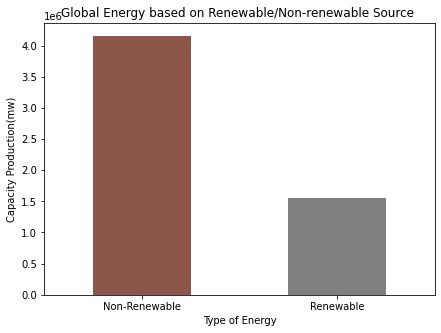

In [ ]:
#Visualising the information above:
Z=df1.groupby('renewable/Non-Renewable')['Capacity(MW)'].sum()
Z.plot.bar(color=['C5', 'C7'], x='renewable/Non-Renewable', y='Capacity(MW)', rot=0, figsize=(7,5))
plt.title("Global Energy based on Renewable/Non-renewable Source ")
plt.xlabel("Type of Energy")
plt.ylabel("Capacity Production(mw)")

The Globe heavily relies on non-renewable energy Sources to Produce Electricity.


5. **Countries Leading in**:

a.) **Renewable Energy Consumption**

In [ ]:
#Countries using the Highest renewarbe Energy:
df1[df1['renewable/Non-Renewable'] == "Renewable"].groupby('Country')['Capacity(MW)'].sum().sort_values(ascending=False).head(5)


Country
China                       364843.88000
United States of America    253116.55000
Brazil                      122985.52113
Canada                       97405.30000
India                        75760.98000
Name: Capacity(MW), dtype: float64

b.) **Non-Renewable Energy Consumption**

In [ ]:
#Countries using the Highest non-renewarbe Energy:
df1[df1['renewable/Non-Renewable'] == "Non-Renewable"].groupby('Country')['Capacity(MW)'].sum().sort_values(ascending=False).head(5)

Country
China                       1050223.500
United States of America     951521.500
India                        240327.566
Japan                        181553.950
Russia                       181091.610
Name: Capacity(MW), dtype: float64

6. **Energy in Kenya**

In [ ]:
#Electricity Production In Kenya:
G= df1[df1['Country'] == 'Kenya'].groupby('primary_fuel')['Capacity(MW)'].sum().sort_values(ascending=False)
G

primary_fuel
Hydro         785.2
Geothermal    754.0
Oil           555.5
Wind          335.5
Solar          55.7
Name: Capacity(MW), dtype: float64

Text(0, 0.5, 'Capacity Production(mw)')

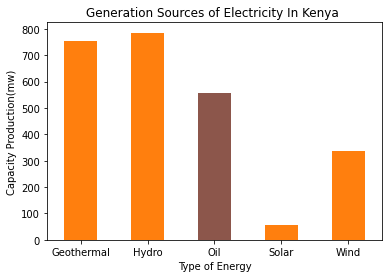

In [ ]:
#Plotting this information:
G= df1[df1['Country'] == 'Kenya'].groupby('primary_fuel')['Capacity(MW)'].sum()
G.plot.bar(color=['C1', 'C1', 'C5'], x='primary_fuel', y='Capacity(MW)', rot=0)
plt.title("Generation Sources of Electricity In Kenya ")
plt.xlabel("Type of Energy")
plt.ylabel("Capacity Production(mw)")

From the Information above, it is clear that Kenya relies on Renewable Energy as the Main generation sources of Electricity.

As the World advocates for Clean Energy, Most of Kenya's electricity is generated by renewable energy sources something commendable since the Environment is not adversely affected.

# Conclusion
From  our analysis, the global relies on Non Renewable Energy sources in electricity production.
This are Sources that impact negatively to the environment. 

For this reason, it’s important to:

 - promote renewable sources as alternatives.Reducing our reliance on nonrenewable resources and expanding our renewable energy usage is one of the keys to a sustainable future.

- Plants that are highly dependent on coal as the primary fuel to embrace several found ways of reducing sulfur and other impurities from coal.

- Currently, 70% of the Kenya's installed electricity capacity comes from renewable energy sources. A transition to fully renewable energy could further boost the population’s access to the national power grid and reduce manufacturing production costs.